In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('Mad_MLDATA.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(1,6)
    self.l2=nn.Linear(6,12)
    self.l3=nn.Linear(12,20)
    self.l4=nn.Linear(20,1)
    self.relu=nn.ReLU()
    self.history={'loss':[]}
  def forward(self,x):
    x=self.relu(self.l1(x))
    x=self.relu(self.l2(x))
    x=self.relu(self.l3(x))
    x=self.l4(x)
    return x


my_model=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(my_model.parameters(),lr=0.001)

In [ ]:
def train_model(my_model, X_train, y_train, criterion, optimizer, epochs=2000):
  for i in range(epochs):
    optimizer.zero_grad()
    loss=criterion(my_model(X_train),y_train)
    loss.backward()
    optimizer.step()
    my_model.history['loss'].append(loss.item())
    if i % 200 == 0:
      print(f'Epoch [{i}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:
train_model(my_model, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 13017.588867
Epoch [200/2000], Loss: 5784.979980
Epoch [400/2000], Loss: 781.878174
Epoch [600/2000], Loss: 440.743164
Epoch [800/2000], Loss: 126.997353
Epoch [1000/2000], Loss: 12.672617
Epoch [1200/2000], Loss: 1.565645
Epoch [1400/2000], Loss: 0.154154
Epoch [1600/2000], Loss: 0.122362
Epoch [1800/2000], Loss: 0.106224


In [ ]:
with torch.no_grad():
    test_loss = criterion(my_model(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 9.102865


In [ ]:
loss_df = pd.DataFrame(my_model.history)

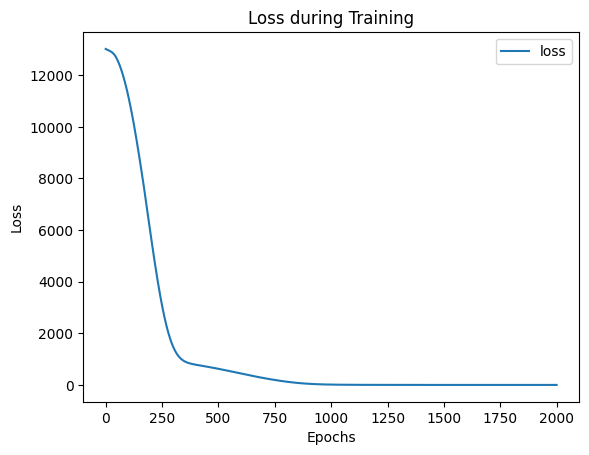

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[20]], dtype=torch.float32)
prediction = my_model(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 200.45703125
